<a href="https://colab.research.google.com/github/conquerv0/Pynaissance/blob/master/1.%20Basic%20Framework/Pandas_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis with Pandas**

Pandas provides a range of toolkit for data analysis through the two basic pandas data strucutures: DataFrame and Series. This guide introduces the basic characteristics of the two classes and explores the capacity Pandas provides through these two classes and other powerful functions. 


**I. DataFrame**

The DataFrame class can efficiently handle data in tabular form, similar to a relational database and an Excel spreadsheet. 


In [ ]:
import pandas as pd
# Defining a dataframe with specified column label and index values.
df = pd.DataFrame([400, 200, 90, 300], 
                  columns=['Price'], 
                  index=['a', 'b', 'c', 'd'])

# Index and Columns attribute and object.
df.index
df.columns

# Get value at the specified index
df.loc['c']
df.iloc[1:3]

# Calculate the sum of a column
df.sum()

# Use apply method to calculate in a vectorized fashion
df.apply(lambda x: x ** 2)
df**2 

# Modifying dataframe by adding columns of different object, 
# even df object is possible. The indices will be aligned automatically.
df['put/call'] = (0.3, 0.5, 0.8, 0.2)
df['ticker'] = pd.DataFrame(['TSLA', 'AMD', 'AAPL', 'BABA'], 
                            index=['a', 'c', 'b', 'd'])

"""
Note that appending other data to the pandas dataframe work similarly.
However, appending some data structure such as dictionary, 
incomplete data can results in loss of index information 
and NaN values respectively.
"""

df

# Calculate the mean over the columns specified.
df[['Price','put/call']].mean()
df[['Price','put/call']].std()

Price       133.010025
put/call      0.264575
dtype: float64

In [9]:
import numpy as np

# Set up a normally distributed random number ndarray.
np.random.seed(100)
a = np.random.standard_normal((9,4))

# Creating the dataframe from ndarray object.
df = pd.DataFrame(a)

# This process can be "undone", that is, ndarray can be created from df.
df.values
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

DateTimeIndex object can be generated by date_range function. The frequency parameter that can be taken are as followed:

B Business day frequency

C Custom business day frequency

D Calendar day frequency


**2. Basic Analytics**

In [ ]:
# Get metainformation regarding the data.
df.info()

# Get summary statistics per columns. 
df.describe()

# Calculate differents sums and means.
df.sum()
df.mean()
df.mean(axis=0)

# Row-wise mean
df.mean(axis=1)

# Column-wise cumulative mean.
df.cumsum()

In general, Pandas DataFrame object also support NumPy Universal functions, similar to applying such operations to an ndarray objects that contain the same type of data.

In [ ]:
# Column-wise mean
np.mean(df)

# Element-wise natural logarithm
np.log(df)

# Element-wise square root for the absolute values.
np.sqrt(abs(df))

3. Basic Visualization

Pandas also provide a wrapper for matplotlib specifically designed to support DataFrame object. Such, some basic visualization of data can be performed on pandas. 

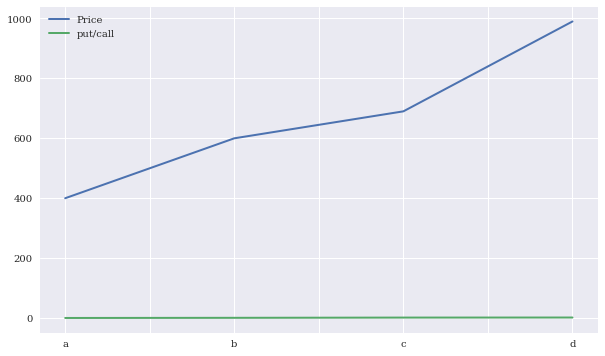

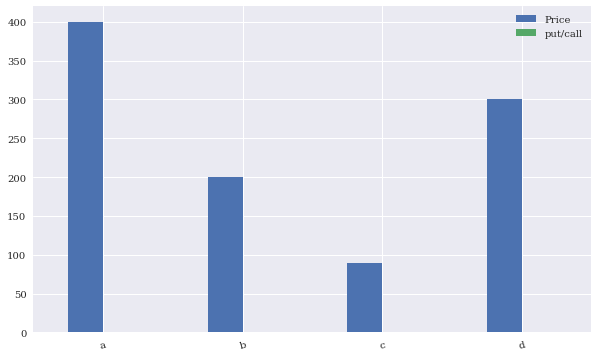

In [ ]:
from pylab import plt, mpl

# Customize the plotting style with seaborn
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

# makes the plot appears in line with the code.
%matplotlib inline

# Plot the mean as line plot
df.cumsum().plot(lw=2.0, figsize=(10, 6))

# Alternatively, we can plot a bar plot with the same data
df.plot.bar(figsize=(10, 6), rot=15)

# or, equivalently: df.plot(kind='bar', figsize=(10, 6))

**II. The Series Class**

Series is another important class in the Pandas packages. It is characterized by its feature of having only a single column of data. Such, it can be obtained from selecting a single column from a multi-column DataFrame object.



7.5

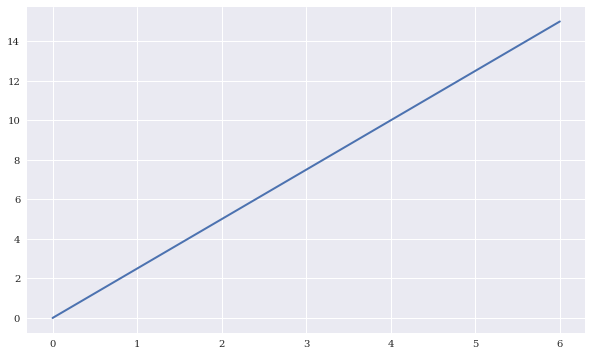

In [10]:
type(df)
sc = pd.Series(np.linspace(0, 15, 7), name='series')
type(sc)

# All main methods for pandas DataFrame work for Series 
sc.plot(lw=2.0, figsize=(10, 6))
sc.mean()

4. GroupBy Operation

GroupBy operation works similar to the GroupBy in SQL

In [13]:
# Randomly construct some dataframe
import numpy as np
np.random.seed(100)
a = np.random.standard_normal((9, 4))
df = pd.DataFrame(a)
df.columns = ['No1', 'No2', 'No3', 'No4']
dates = pd.date_range('2019-1-1', periods=9, freq='M')

df['Quarter']=['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']

# Group according to the quarter column.
groups = df.groupby('Quarter')

# Obtain various information about the groups.
groups.size()
groups.mean()
groups.max()

# Aggregating the calculated results. 
groups.aggregate([min, max]).round(2)

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

Grouping can also be done with multiple groups, such multiple criteria can be used.

In [15]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()
groups[['No1', 'No4']].aggregate([sum, np.mean])

No1                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      Even      0.981321  0.981321 -1.070043 -1.070043
        Odd      -1.939261 -0.969631  0.182727  0.091364
Q2      Even      1.035387  0.517693 -0.946847 -0.473423
        Odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      Even     -0.326238 -0.326238 -1.443217 -1.443217
        Odd      -0.571834 -0.285917  0.905609  0.452805